In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

import sys
sys.path.append('/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs')
from xarray_tools import find_cor_ts
from stats import get_stats, clean_xs_ys, fit_lm
from plotting import add_text
sys.path.append('/bsuhome/zacharykeskinen/uavsar-coherence/src/constants')
from colors import loc_colors

In [2]:
dss = {fp.stem.split('_')[0]: xr.open_dataset(fp) for fp in Path('~/scratch/coherence/uavsar').expanduser().glob('*_tau.nc')}

In [86]:
for name, ds in dss.items():
    print(name)
    sub = (ds['cor'].sel(pol = 'VV') - ds['cor'].sel(pol = 'HH')).mean(['x','y'])
    sub = sub.where(abs(sub)>0.03).dropna('time1', how = 'all').dropna('time2', how = 'all').dropna('heading', how = 'all')
    from itertools import product
    for t1, t2, heading in product(sub.time1.values, sub.time2.values, sub.heading.values):
        if sub.sel(time1 = t1, time2 = t2, heading = heading).isnull().any(): continue
        print(sub.sel(time1 = t1, time2 = t2, heading = heading).values.ravel()[0])
        print(ds.sel(model_time = slice(t1, t2))['model_melt'].sum('model_time').values.ravel()[0])
        model = ds.sel(model_time = slice(t1, t2))
        print((model['model_sd'].isel(model_time = -1) - model['model_sd'].isel(model_time = 0)).values.ravel()[0])
        print(f"time1 = '{t1}', time2 = '{t2}', heading = {heading}")

rockmt
0.031667773
time1 = '2021-02-24T00:00:00.000000000', time2 = '2021-03-04T00:00:00.000000000', heading = 141
0.035394307
time1 = '2021-03-04T00:00:00.000000000', time2 = '2021-03-11T00:00:00.000000000', heading = 141
alamos
grmesa
0.045175444
time1 = '2020-02-27T00:00:00.000000000', time2 = '2020-03-13T00:00:00.000000000', heading = 274
0.034898624
time1 = '2021-01-28T00:00:00.000000000', time2 = '2021-02-04T00:00:00.000000000', heading = 274
0.036366712
time1 = '2021-02-04T00:00:00.000000000', time2 = '2021-02-11T00:00:00.000000000', heading = 274
0.04590646
time1 = '2021-02-11T00:00:00.000000000', time2 = '2021-03-04T00:00:00.000000000', heading = 274
0.040597133
time1 = '2021-03-04T00:00:00.000000000', time2 = '2021-03-11T00:00:00.000000000', heading = 274
0.03894198
time1 = '2021-03-17T00:00:00.000000000', time2 = '2021-03-23T00:00:00.000000000', heading = 274
uticam
0.09579831
time1 = '2021-01-16T00:00:00.000000000', time2 = '2021-01-21T00:00:00.000000000', heading = 210
0.0

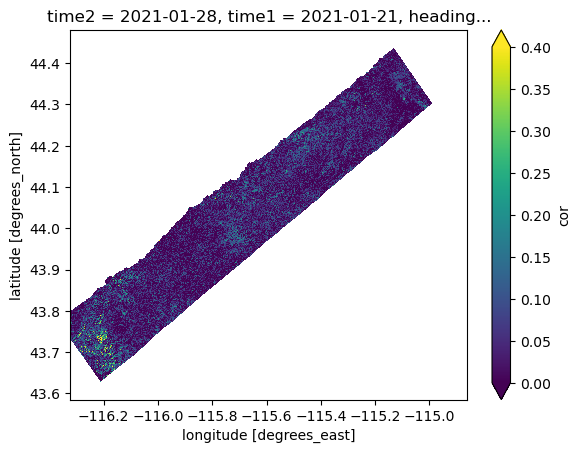

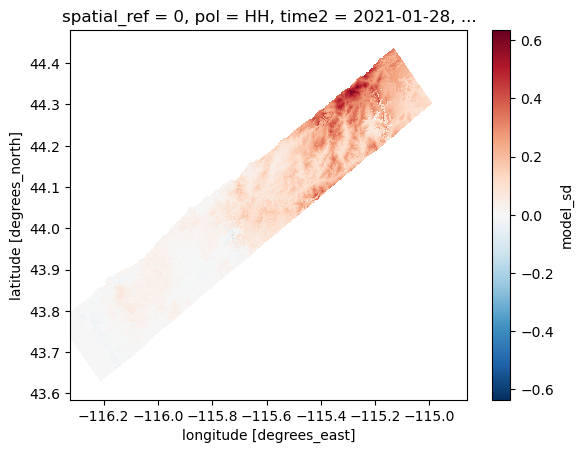

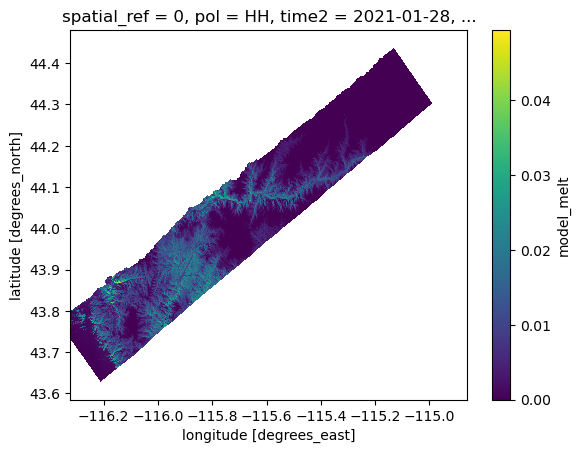

In [8]:
ex_dir = Path('/bsuhome/zacharykeskinen/scratch/coherence/polarization/examples')
import rioxarray as rxa
site = 'lowman'
# t1, t2, heading = '2021-01-16T00:00:00.000000000', '2021-01-21T00:00:00.000000000', 210
time1, time2, heading = '2021-01-21T00:00:00.000000000', '2021-01-28T00:00:00.000000000', 232
t = dss[site].sel(time1 = time1, time2 = time2, heading = heading)['cor']
(t.sel(pol = 'VV') - t.sel(pol = 'HH')).plot(vmax = 0.4, vmin = 0)
plt.show()
# (t.sel(pol = 'VV') - t.sel(pol = 'HH')).rio.write_crs('EPSG:4326').rio.to_raster(ex_dir.joinpath(f'codiff-{site}-{time1}-{time2}-{heading}.tif'))

model = dss[site].sel(model_time = slice(time1, time2))
(model['model_sd'].isel(model_time = -1) - model['model_sd'].isel(model_time = 0)).where(~t.sel(pol = 'HH').isnull()).plot()
# (model.isel(model_time = -1) - model.isel(model_time = 0))['model_sd'].where(~t.sel(pol = 'HH').isnull()).rio.write_crs('EPSG:4326').rio.to_raster(ex_dir.joinpath(f'sddiff-{site}-{time1}-{time2}-{heading}.tif'))
plt.show()

model = dss[site].sel(model_time = slice(time1, time2))
model['model_melt'].sum('model_time').where(~t.sel(pol = 'HH').isnull()).plot()
# model.sum('model_time')['model_melt'].where(~t.sel(pol = 'HH').isnull()).where(~t.sel(pol = 'HH').isnull()).rio.write_crs('EPSG:4326').rio.to_raster(ex_dir.joinpath(f'cummelt-{site}-{time1}-{time2}-{heading}.tif'))


In [66]:
t = dss['grmesa'].sel(time1 = '2021-02-11T00:00:00.000000000', time2 = '2021-03-04T00:00:00.000000000', heading = 274, model_time = slice('2021-02-11T00:00:00.000000000','2021-03-04T00:00:00.000000000'))['model_sd']

In [70]:
(t.isel(model_time = -1) - t.isel(model_time = 0)).rio.write_crs('EPSG:4326').rio.to_raster(Path('~/sd_change_ex.tif').expanduser())

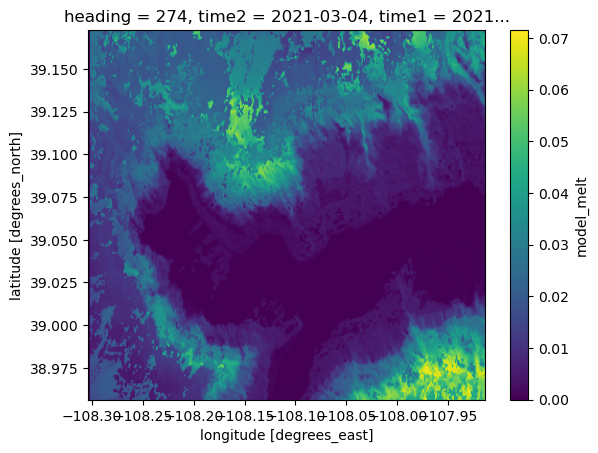

In [65]:
t.sum('model_time').plot()